## LongDistanceTelecoms-Field-Operations-Mini-Analysis-with-Python by Dumisani Maxwell Mukuchura

#### Dataset Source: Available on GitHub in the same Repo this Project is Hosted
#### Contact: dumisanimukuchura@gmail.com 
#### LinkedIn: https://www.linkedin.com/in/dumisani-maxwell-mukuchura-4859b7170/ 

#### A quick but impactful EDA of a 6-row dataset from a fictional telecom company.

**Disclaimer:** This is a demonstration of analytical thought process on a very small dataset. Any derived insights would require a significantly larger and more representative dataset for validation in a real-world scenario.


### 1. Libraries and Data Importation 

In [4]:
#Libraries Imported

import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
# Get the current working directory
current_dir = os.getcwd()

# Trim to one level above
base_dir = os.path.dirname(current_dir)

# Construct the path to the data folder
data_dir = os.path.join(base_dir, "data")

# Construct the full path to the CSV file
csv_file_path = os.path.join(data_dir, "telecom_field_operations.csv")

#Import File into DataFrame
df = pd.read_csv(csv_file_path, index_col="Work_ID")

#View the first 6 rows of the DataFrame (knowing it has 6 rows)
df.head(6)

,Technician_Name,Age,Gender,Education_Level,Years_Experience,Region,Work_Type,Duration_Hrs,Tasks_Completed,Faults_Resolved,Equipment_Used,Site_Type,Issue_Escalated,Customer_Satisfaction
Work_ID,,,,,,,,,,,,,,
W001,Sophia Matthews,29,F,Diploma,5,Harare,Fiber Installation,5.0,3,2,"Splicer, OTDR",Urban,No,4.5
W002,Liam Nkosi,32,M,BSc,8,Bulawayo,Base Station Repair,7.5,5,4,"Multimeter, Analyzer",Rural,Yes,3.0
W003,Isabella Chikosi,27,F,BSc,4,Gweru,Router Config,3.0,2,2,"Laptop, Patch Cords",Urban,No,5.0
W004,Noah Banda,35,M,Diploma,10,Mutare,Signal Testing,6.5,4,3,Spectrum Analyzer,Rural,Yes,2.5
W005,Ava Moyo,31,F,BSc,6,Harare,Fiber Maintenance,4.5,3,3,"OTDR, Power Meter",Urban,No,4.0
W006,Ethan Sibanda,28,M,Diploma,7,Masvingo,Base Station Repair,8.0,6,5,Signal Tester,Rural,Yes,3.5


In [10]:
#View DataFrame Information and Descriptions
print(df.shape)
df.info()

(6, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, W001 to W006
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Technician_Name        6 non-null      object 
 1   Age                    6 non-null      int64  
 2   Gender                 6 non-null      object 
 3   Education_Level        6 non-null      object 
 4   Years_Experience       6 non-null      int64  
 5   Region                 6 non-null      object 
 6   Work_Type              6 non-null      object 
 7   Duration_Hrs           6 non-null      float64
 8   Tasks_Completed        6 non-null      int64  
 9   Faults_Resolved        6 non-null      int64  
 10  Equipment_Used         6 non-null      object 
 11  Site_Type              6 non-null      object 
 12  Issue_Escalated        6 non-null      object 
 13  Customer_Satisfaction  6 non-null      float64
dtypes: float64(2), int64(4), object(8)
memory usage: 720.

- From the view we can not we have 6 rows and 14 columns without any missing values and designated Work_ID index

### 2. SECTION A - Descriptive Summary

#### Q1: What is the average customer satisfaction rating across all technicians?

In [14]:
Customer_Satisfaction_Average = df['Customer_Satisfaction'].mean()
print(f"Customer_Satisfaction_Average: {Customer_Satisfaction_Average} out of 5")

Customer_Satisfaction_Average: 3.75 out of 5


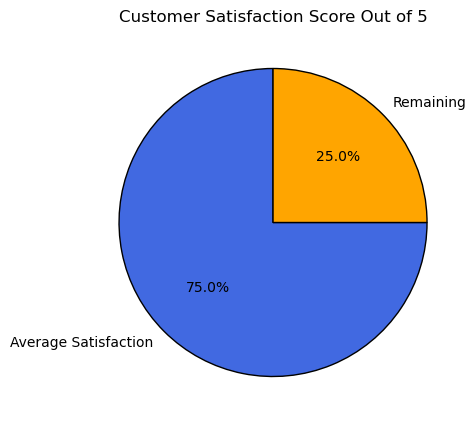

In [39]:
# Define satisfaction breakdown
satisfaction_filled = Customer_Satisfaction_Average  # Portion representing the actual score
satisfaction_remaining = 5 - Customer_Satisfaction_Average  # Portion representing the missing part

# Labels and values
labels = ['Average Satisfaction', 'Remaining']
sizes = [satisfaction_filled, satisfaction_remaining]
colors = ['royalblue', 'orange']

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Customer Satisfaction Score Out of 5')
plt.show()

#### Q2: What is the distribution (count) of technicians by education level?

In [16]:
education_dist = df['Education_Level'].value_counts()
print("Distribution of technicians by education level:")
print(education_dist.to_string(), "\n")

Distribution of technicians by education level:
Education_Level
Diploma    3
BSc        3 



#### Q3: What is the average duration of work by gender?

In [19]:
avg_duration_gender = df.groupby('Gender')['Duration_Hrs'].mean()
print("Average duration of work by gender:")
print(avg_duration_gender.to_string(), "\n")

Average duration of work by gender:
Gender
F    4.166667
M    7.333333 



- Male Technicians have a higher average duration of work as compared to Female Technicians.

#### Q4: Calculate the mean years of experience per region. 

In [20]:
mean_exp_region = df.groupby('Region')['Years_Experience'].mean()
print("Mean years of experience per region:")
print(mean_exp_region.to_string(), "\n")

Mean years of experience per region:
Region
Bulawayo     8.0
Gweru        4.0
Harare       5.5
Masvingo     7.0
Mutare      10.0 



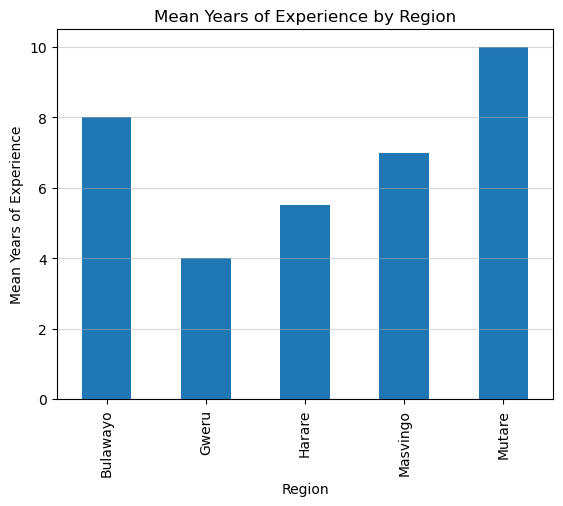

In [37]:
mean_exp_region.plot(kind="bar")
plt.grid(axis='y', alpha=0.5)
plt.xlabel("Region")
plt.ylabel("Mean Years of Experience")
plt.title("Mean Years of Experience by Region")
plt.show()

#### Q5: Generate a histogram showing the age distribution of technicians.

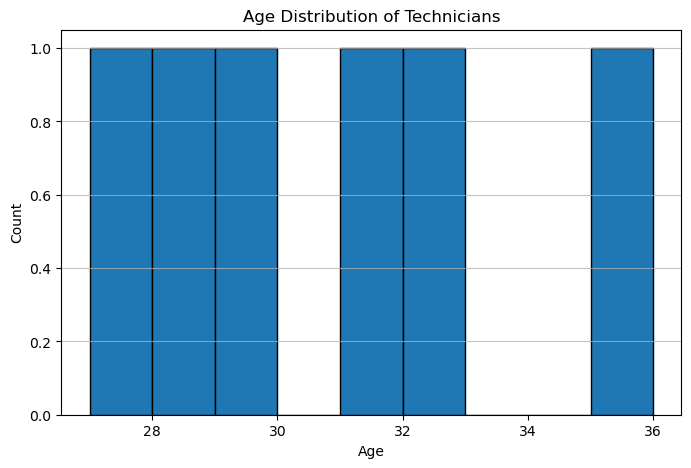

In [21]:
#A histogram showing the age distribution of technicians.
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=range(min(df['Age']), max(df['Age'])+2), edgecolor='black')
plt.title('Age Distribution of Technicians')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show();

- We can note that we have more technicians on the lower scale of age.

### SECTION B – Diagnostic Analytics

#### Q6: Is there a correlation between years of experience and the number of faults resolved?

In [23]:
correlation = df['Years_Experience'].corr(df['Faults_Resolved'])
print(f"Correlation between years of experience and faults resolved: {correlation:.2f}\n")

Correlation between years of experience and faults resolved: 0.50



- There is a slight positive correlation of 0.5 meaning when number of years of experience increases the number of faults resolved also increases and vice versa

#### Q7. Do older technicians (above or equal to 30) tend to resolve more faults or have higher satisfaction scores? 

In [25]:
#Define Age Brackets
older_tech = df[df['Age'] > 30]
younger_tech = df[df['Age'] <= 30]

print("Performance comparison between older (>30) and younger (≤30) technicians:")

#Older than or equal to 30 years
if not older_tech.empty:
    older_faults = older_tech['Faults_Resolved'].mean()
    older_satisfaction = older_tech['Customer_Satisfaction'].mean()
    print(f"   Technicians above or equal to 30:\n      Avg faults resolved: {older_faults:.1f}\n      Avg satisfaction: {older_satisfaction:.1f}")
else:
    print("   No technicians above or equal to 30 in the dataset")

#Younder than 30 years
if not younger_tech.empty:
    younger_faults = younger_tech['Faults_Resolved'].mean()
    younger_satisfaction = younger_tech['Customer_Satisfaction'].mean()
    print(f"   Technicians younger than 30:\n      Avg faults resolved: {younger_faults:.1f}\n      Avg satisfaction: {younger_satisfaction:.1f}")
else:
    print("   No technicians younger than 30 in the dataset")

# Calculating differences for easier comparison
if not older_tech.empty and not younger_tech.empty:
    fault_diff = older_faults - younger_faults
    sat_diff = older_satisfaction - younger_satisfaction
    print(f"\n   Comparison:")
    print(f"   Older technicians resolve {fault_diff:.1f} more faults on average")
    print(f"   Older technicians have {sat_diff:.1f} higher satisfaction scores on average")
elif older_tech.empty and younger_tech.empty:
    print("\n   No age data available for comparison")
elif older_tech.empty:
    print("\n   No older technicians available for comparison")
else:
    print("\n   No younger technicians available for comparison")
print()

Performance comparison between older (>30) and younger (≤30) technicians:
   Technicians above or equal to 30:
      Avg faults resolved: 3.3
      Avg satisfaction: 3.2
   Technicians younger than 30:
      Avg faults resolved: 3.0
      Avg satisfaction: 4.3

   Comparison:
   Older technicians resolve 0.3 more faults on average
   Older technicians have -1.2 higher satisfaction scores on average



#### Q8: Compare satisfaction scores between technicians with diplomas vs. degrees. 

In [29]:
print("Average Satisfaction scores out of 5 by education level:")
education_satisfaction = df.groupby('Education_Level')['Customer_Satisfaction'].mean()

if not education_satisfaction.empty:
    for education, score in education_satisfaction.items():
        print(f"   {education}: {score:.1f}")
else:
    print("   No education level data available")
print()

Average Satisfaction scores out of 5 by education level:
   BSc: 4.0
   Diploma: 3.5



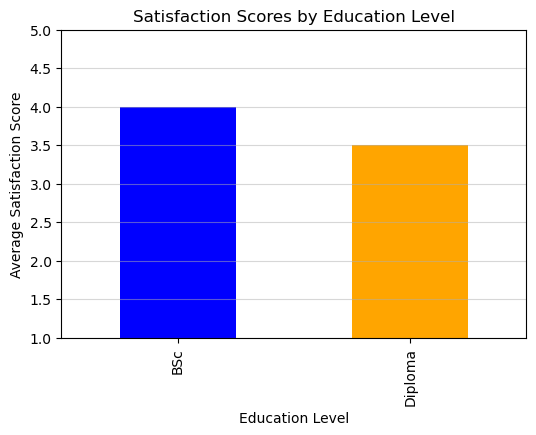

In [32]:
#Plotting the Satisfaction Scores by Education Level
plt.figure(figsize=(6, 4))
education_satisfaction.plot(kind='bar', color=['blue', 'orange'])  # Directly using the Series
plt.xlabel("Education Level")
plt.ylabel("Average Satisfaction Score")
plt.title("Satisfaction Scores by Education Level")
plt.ylim(1, 5)  # scores range from 1 to 5
plt.grid(axis='y', alpha=0.5)
plt.show()

- Technicians with BSc have higher average satisfaction scores compared to the Diploma owning Technicians.

#### Q9: Are there gender-based differences in issue escalation or task completion rates? 

In [41]:
gender_groups = df.groupby('Gender')
if len(gender_groups) > 1:
    # Issue escalation
    escalation_rate = (gender_groups['Issue_Escalated'].apply(lambda x: (x == 'Yes').mean()))*100
    # Task completion
    task_completion = gender_groups['Tasks_Completed'].mean()

    print("Gender-based differences:")
    print("   Issue escalation rate:")
    print(escalation_rate.to_string(), "\n")
    print("   Average tasks completed:")
    print(task_completion.to_string(), "\n")
else:
    print("Only one gender present in data\n")

Gender-based differences:
   Issue escalation rate:
Gender
F      0.0
M    100.0 

   Average tasks completed:
Gender
F    2.666667
M    5.000000 



- We can note that Males have a 100% escalation rate compared to Females with 0%, then also Males complete more tasks on average as compared to Females.

#### Q10: Which combination of gender and education level is most efficient (i.e., highest average faults resolved per hour)? 

In [43]:
df['Efficiency'] = df['Faults_Resolved'] / df['Duration_Hrs']
efficiency_groups = df.groupby(['Gender', 'Education_Level'])['Efficiency'].mean().sort_values(ascending=False)
print("Most efficient gender-education combinations (faults resolved per hour):")
print(efficiency_groups.to_string(), "\n")

Most efficient gender-education combinations (faults resolved per hour):
Gender  Education_Level
F       BSc                0.666667
M       Diploma            0.543269
        BSc                0.533333
F       Diploma            0.400000 



- Female holders of the BSc Degree are the most efficient in terms of Highest Average faults resolved per hour.

### SECTION C – Interpretation & Recommendations

#### Q11: Identify two demographic factors that influence customer satisfaction the most.

In [44]:
# Calculate the total range of satisfaction scores (for standardization)
sat_range = df['Customer_Satisfaction'].max() - df['Customer_Satisfaction'].min()

# For numeric demographic factors (age, years experience)
numeric_demo_cols = ['Age', 'Years_Experience']  # explicitly listing demographic numeric columns
numeric_corrs = df[numeric_demo_cols].corrwith(df['Customer_Satisfaction']).abs().sort_values(ascending=False)

# For categorical demographic factors (gender, education level, region)
categorical_demo_cols = ['Gender', 'Education_Level', 'Region']  # listing of categorical demographic columns
cat_results = []

for col in categorical_demo_cols:
    # Calculate mean satisfaction for each category
    group_means = df.groupby(col)['Customer_Satisfaction'].mean()
    # Calculate STANDARDIZED effect size (range divided by total satisfaction range)
    effect_size = (group_means.max() - group_means.min()) / sat_range
    cat_results.append((col, effect_size))

# Sort by effect size
cat_results.sort(key=lambda x: x[1], reverse=True)

# Combine results
print("Demographic factors influencing customer satisfaction:")
print("\nNumeric factors (absolute correlation coefficients):")
print(numeric_corrs.to_string())

print("\nCategorical factors (standardized effect sizes 0-1):")
for factor, effect in cat_results:
    print(f"{factor}: {effect:.2f}")

# Get top 2 overall (combining both types)
top_factors = []
if len(numeric_corrs) > 0:
    top_factors.append((numeric_corrs.index[0], numeric_corrs.iloc[0], 'numeric'))
if len(cat_results) > 0:
    top_factors.append((cat_results[0][0], cat_results[0][1], 'categorical'))
    if len(cat_results) > 1:  # Add second strongest categorical if available
        top_factors.append((cat_results[1][0], cat_results[1][1], 'categorical'))

# Sort by impact (correlation/effect size)
top_factors.sort(key=lambda x: x[1], reverse=True)

print("\nTop two demographic factors influencing customer satisfaction:")
for i, (factor, impact, typ) in enumerate(top_factors[:2], 1):
    print(f"{i}. {factor} ({typ}, impact: {impact:.2f})")

Demographic factors influencing customer satisfaction:

Numeric factors (absolute correlation coefficients):
Years_Experience    0.989743
Age                 0.835214

Categorical factors (standardized effect sizes 0-1):
Region: 1.00
Gender: 0.60
Education_Level: 0.20

Top two demographic factors influencing customer satisfaction:
1. Region (categorical, impact: 1.00)
2. Years_Experience (numeric, impact: 0.99)


- Comment: The word demographic is a vague word and when we look both into categorical and numerical fields we see results, but to ascetain for sure if Region has impact we would require more data since the spread is limited

#### Q12: Recommend staffing strategies based on region, experience, and education level to reduce issue escalations. 

In [51]:
# Analyze issue escalation patterns
escalation_analysis = df.groupby(['Region', 'Education_Level', 'Years_Experience'])['Issue_Escalated'].apply(
    lambda x: (x == 'Yes').mean()).reset_index()
escalation_analysis.columns = ['Region', 'Education_Level', 'Years_Experience', 'Escalation_Rate']

# Find combinations with lowest escalation rates
low_escalation = escalation_analysis.sort_values('Escalation_Rate')
print("Recommended staffing strategies (combinations with lowest escalation rates):")
print(low_escalation.to_string(index=False), "\n")

Recommended staffing strategies (combinations with lowest escalation rates):
  Region Education_Level  Years_Experience  Escalation_Rate
   Gweru             BSc                 4              0.0
  Harare             BSc                 6              0.0
  Harare         Diploma                 5              0.0
Bulawayo             BSc                 8              1.0
Masvingo         Diploma                 7              1.0
  Mutare         Diploma                10              1.0 



- This allows for staff to be rotated to share knowledge and adopt a way of work that reduces escalation rates.

#### Q13: Based on your EDA, suggest one way to improve technician productivity across all demographics.

In [64]:
df = df.reset_index()  # Moves WorkID from index to a column

# First ensure we have our efficiency metric calculated
df['Efficiency'] = df['Faults_Resolved'] / df['Duration_Hrs']

# Create experience tiers (bins) for more meaningful analysis
df['Experience_Tier'] = pd.cut(df['Years_Experience'],
                              bins=[0, 2, 5, 10, 100],
                              labels=['Junior (0-2yrs)', 'Mid (3-5yrs)',
                                      'Senior (6-10yrs)', 'Veteran (10+yrs)'])

# Define actionable demographic factors (modifiable characteristics)
actionable_demographics = ['Education_Level', 'Experience_Tier', 'Region']

# Analyze each demographic factor's impact
results = []
for demo in actionable_demographics:
    # Skip if column doesn't exist
    if demo not in df.columns:
        continue

    # Calculate metrics for each group
    group_stats = df.groupby(demo).agg({
        'Efficiency': 'mean',
        'Customer_Satisfaction': 'mean',
        'Work_ID': 'count'  # count of technicians
    }).rename(columns={'Work_ID': 'Count'})

    # Calculate combined score (50% efficiency, 50% satisfaction)
    max_eff = group_stats['Efficiency'].max()
    max_sat = group_stats['Customer_Satisfaction'].max()
    group_stats['Combined_Score'] = (0.5 * (group_stats['Efficiency'] / max_eff) +
                                   0.5 * (group_stats['Customer_Satisfaction'] / max_sat))

    # Get top performing group
    top_group = group_stats.sort_values('Combined_Score', ascending=False).iloc[0]

    results.append({
        'Factor': demo,
        'Top_Group': top_group.name,
        'Efficiency': top_group['Efficiency'],
        'Satisfaction': top_group['Customer_Satisfaction'],
        'Count': top_group['Count']
    })

# Generate recommendations
print("\nProductivity Improvement Recommendations (Based on Actionable Demographics):")

if not results:
    print("   No actionable demographic factors available for analysis")
else:
    # Sort by combined score
    results.sort(key=lambda x: x['Efficiency'] + x['Satisfaction'], reverse=True)

    for i, res in enumerate(results[:3], 1):  # Show top 3 findings
        print(f"\n{i}. {res['Factor']} Analysis:")
        print(f"   Highest performing group: {res['Top_Group']}")
        print(f"   Efficiency: {res['Efficiency']:.2f} faults/hour")
        print(f"   Satisfaction: {res['Satisfaction']:.2f}/5")
        print(f"   Sample size: {res['Count']} technicians")

        # Generate specific recommendation
        if res['Factor'] == 'Education_Level':
            print("   RECOMMENDATION: Provide targeted training to bring other education groups up to this standard")
        elif res['Factor'] == 'Experience_Tier':
            print("   RECOMMENDATION: Implement mentoring programs where this group shares techniques with others")
        elif res['Factor'] == 'Region':
            print("   RECOMMENDATION: Document and replicate this region's best practices across other locations")

# Additional insight: Education vs Experience matrix
if 'Education_Level' in df.columns and 'Experience_Tier' in df.columns:
    print("\n   Additional Insight: Education-Experience Matrix")
    edu_exp_matrix = df.groupby(['Education_Level', 'Experience_Tier']).agg({
        'Efficiency': 'mean',
        'Customer_Satisfaction': 'mean'
    }).unstack().round(2)
    print(edu_exp_matrix.to_string())


Productivity Improvement Recommendations (Based on Actionable Demographics):

1. Region Analysis:
   Highest performing group: Gweru
   Efficiency: 0.67 faults/hour
   Satisfaction: 5.00/5
   Sample size: 1.0 technicians
   RECOMMENDATION: Document and replicate this region's best practices across other locations

2. Experience_Tier Analysis:
   Highest performing group: Mid (3-5yrs)
   Efficiency: 0.53 faults/hour
   Satisfaction: 4.75/5
   Sample size: 2.0 technicians
   RECOMMENDATION: Implement mentoring programs where this group shares techniques with others

3. Education_Level Analysis:
   Highest performing group: BSc
   Efficiency: 0.62 faults/hour
   Satisfaction: 4.00/5
   Sample size: 3.0 technicians
   RECOMMENDATION: Provide targeted training to bring other education groups up to this standard

   Additional Insight: Education-Experience Matrix
                     Efficiency                                                Customer_Satisfaction                             

C:\Users\Dumisani Mukuchura\AppData\Local\Temp\ipykernel_6512\4183269385.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby(demo).agg({
C:\Users\Dumisani Mukuchura\AppData\Local\Temp\ipykernel_6512\4183269385.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_exp_matrix = df.groupby(['Education_Level', 'Experience_Tier']).agg({
